# Práctica III 
## Nombre: Incluye tu nombre y apellidos

Valor de la práctica en el curso 2 puntos. Calificación de la práctica sobre 10.

### Primer Ejercicio 
    
1 Lee la imagen indexada `trees.tif` con `Image` de `PIL`, crea una paleta que corresponda a niveles de gris (la misma proporción de rojo, verde y azul) y muestra la imagen con la nueva paleta. 
    
2 Convierte la imagen indexada a una imagen de niveles de gris. El nivel de gris deberá ser el promedio de rojo, verde y azul en cada píxel. Realiza tu propia implementación.

Total: 2 puntos

In [2]:
PATHIM="../imagenes curso/"
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

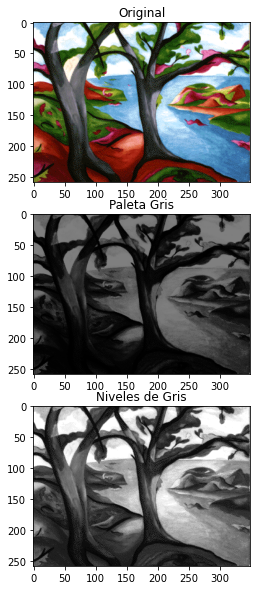

In [3]:
im = PATHIM+"trees.tif"
im = Image.open(im) 
im1 = im.copy()
im2 = im.copy()

# Escribe aquí tu código que implementa la respuesta a 1.
im_palette = im1.getpalette()
gray_palette = np.mean(im_palette, dtype = np.uint8)
im1.putpalette(gray_palette)

# Escribe aquí tu código que implementa la respuesta a 2.
rgbimnp = np.array(im2.convert('RGB'))
grayimnp = np.mean(rgbimnp, -1)

#Código para mostrar todas las imágenes
fig = plt.figure(figsize=(20,10))
fig.add_subplot(3,1,1), plt.title('Original')
plt.imshow(im)
fig.add_subplot(3,1,2), plt.title('Paleta Gris')
plt.imshow(im1)
fig.add_subplot(3,1,3), plt.title('Niveles de Gris')
plt.imshow(grayimnp, cmap='gray')
plt.show()




### Segundo ejercicio

1. Lee la imagen `lindsay.tif` como una imagen de niveles de gris usando `OpenCV`. Selecciona una región dentro de ella y utiliza operadores lógicos para crear una imagen oscura solo dentro de la región de interés mientras que se mantiene la imagen original en el resto.
    
2. Modifica el código del apartado 1 para que la nueva imagen coincida con la imagen original en la región de interés y la parte más oscura fuera.
    
Total: 2 puntos

In [4]:
PATHIM="../imagenes curso/"
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

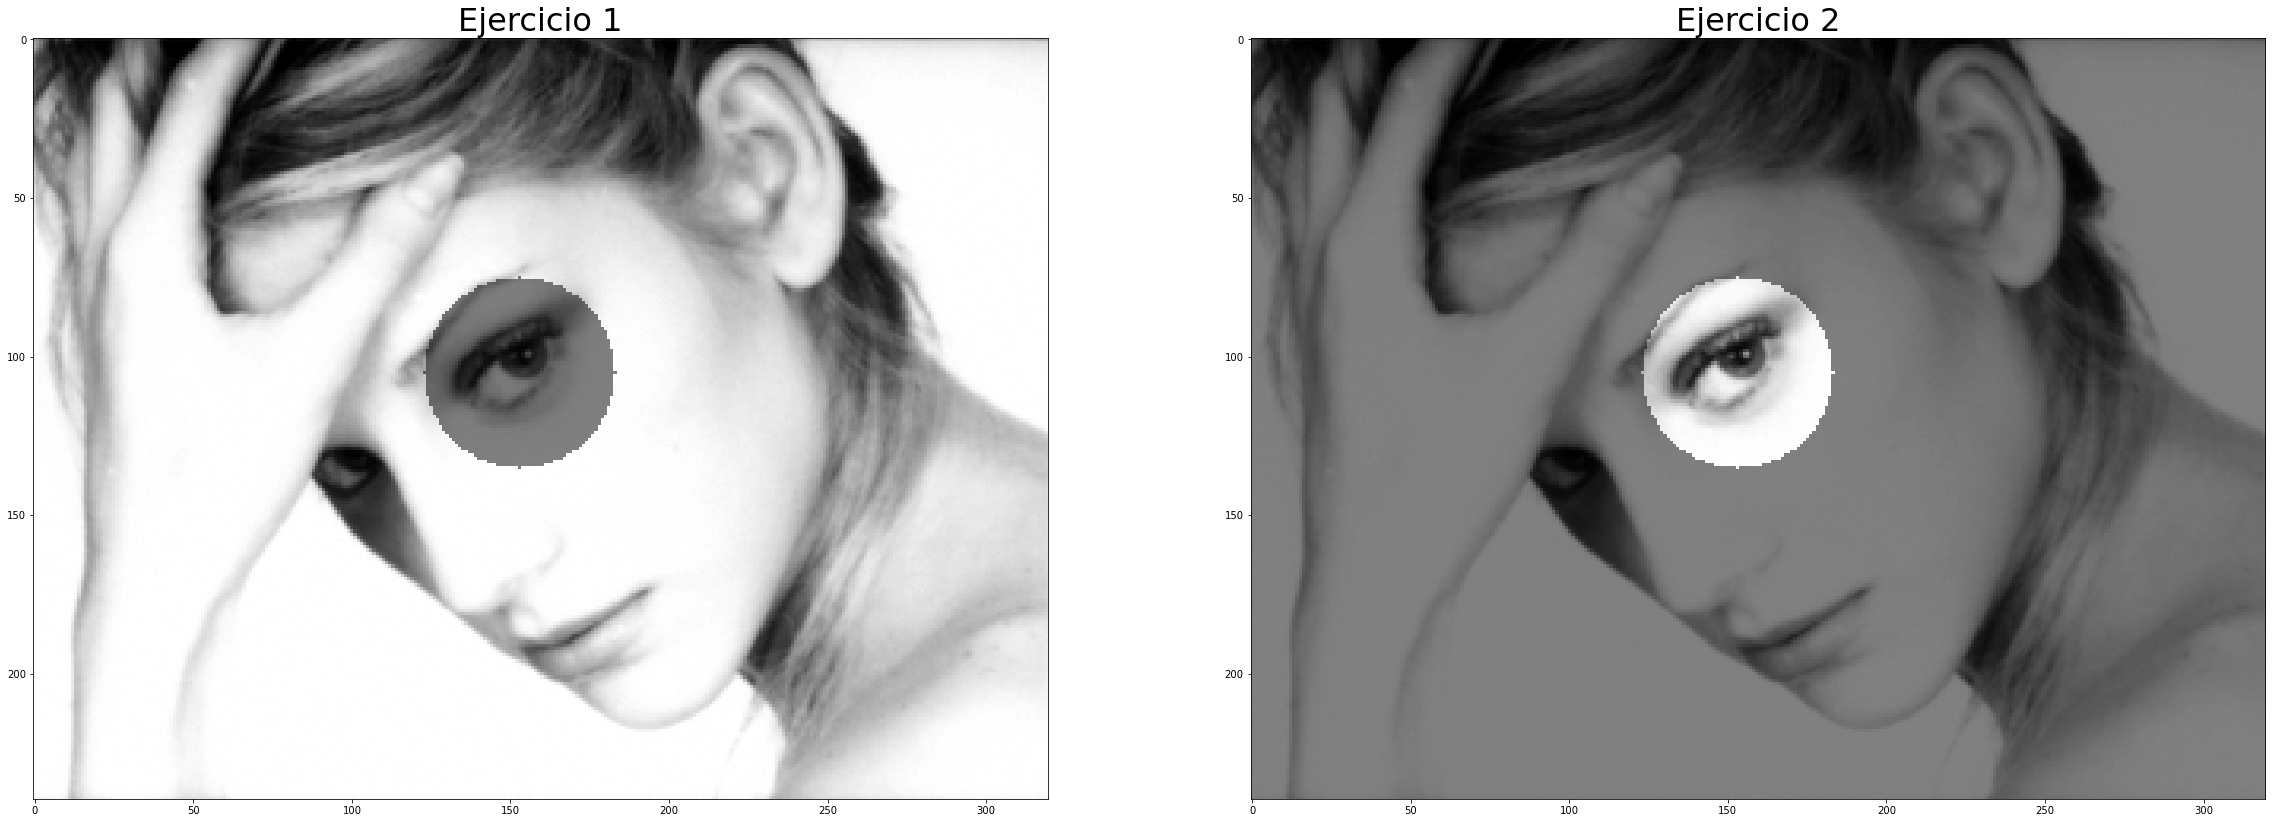

In [7]:
im = PATHIM+"lindsay.tif"
# Incluye aquí la lectura de la imagen
img = cv.imread(im, cv.IMREAD_GRAYSCALE)

# Escribe aquí tu código que implementa la respuesta a a)
height, width = img.shape

    #Calculo una región de interés circular de radio 30, centrado (más o menos) en el ojo
roi = np.zeros((height, width), np.uint8)
cv.circle(roi, (np.uint8(width/2)-7, np.uint8(height/2)-15),30,5,thickness=-1)

#Paso la imagen al espacio [0,1]
img = img/256

    #Usando el operador lógico == calculo el nuevo valor de los píxeles dentro de la región
img_1= np.where(roi==0, img, img*0.5)

# Escribe aquí tu código que implementa la respuesta a b)
img_2 = np.where(roi!=0, img, img*0.5)

#Código para mostrar todas las imágenes
fig = plt.figure(figsize=(40,20))
fig.add_subplot(1,2,1).set_title("Ejercicio 1", fontsize=32)
plt.imshow(img_1, cmap='gray')
fig.add_subplot(1,2,2).set_title("Ejercicio 2", fontsize=32)
plt.imshow(img_2, cmap='gray')

plt.show()


Las dos imágenes siguientes muestran un ejemplo de la solución al apartado 1. Primero se muestra la imagen original y luego la imagen modificada solución del apartado 1.

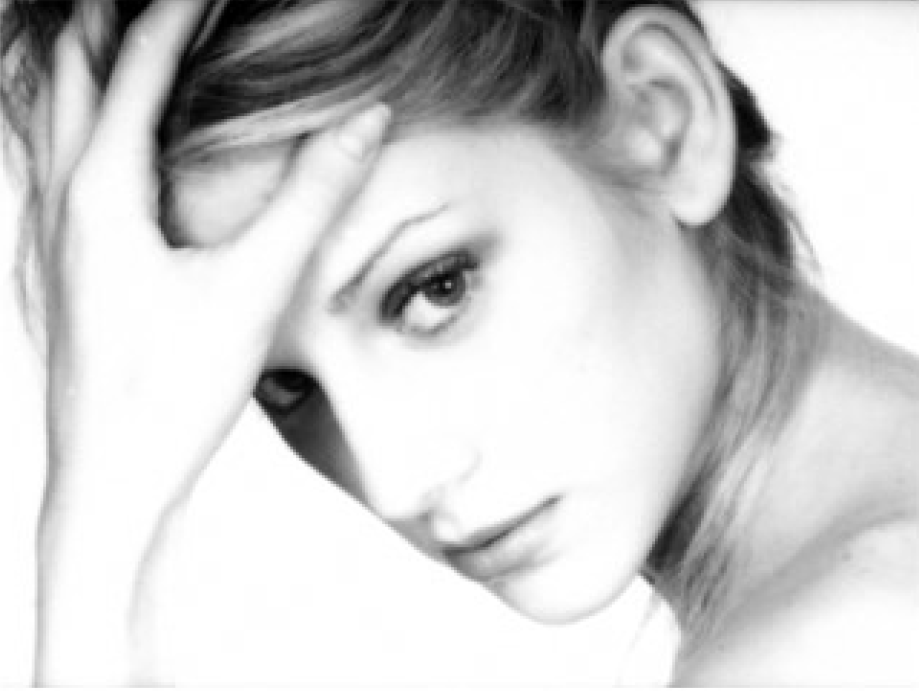

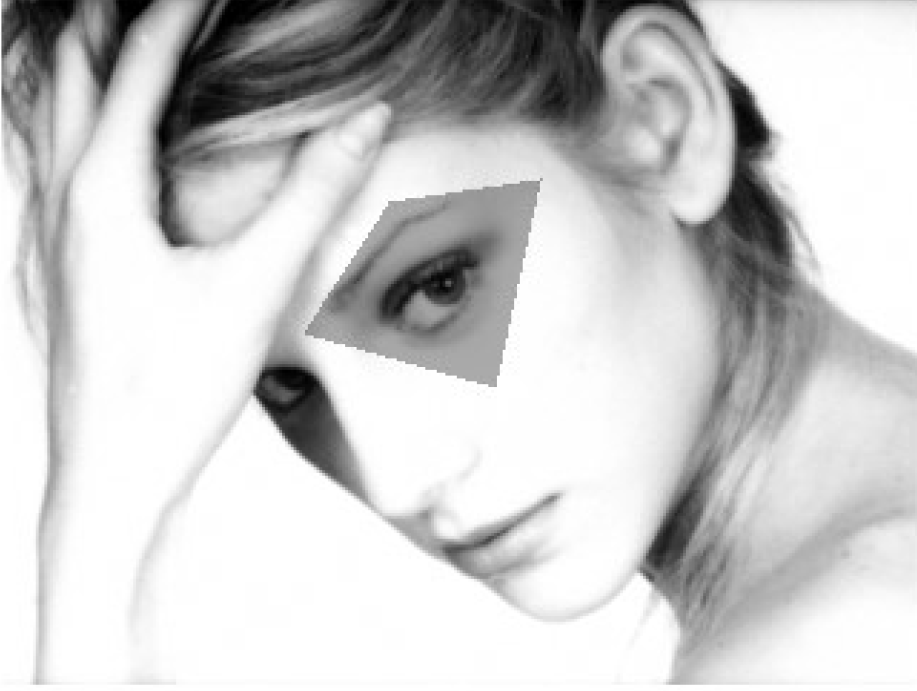

### Tercer ejercicio

1. El código siguiente define dos tipos de transformaciones geométricas: similaridad y afín. Según que la variable `transformationType` sea `Similaridad`o `Afín` implementa una u otra, respectivamente. El código requiere la imagen del objeto al que aplicaremos la transformación geométrica y la máscara donde se encuentra (esta máscara podría haber sido previamente calculada por algún método que veremos a lo largo del curso).

    Explica con detalle los diferentes pasos del código siguiente que realiza la transformación geométrica: indica qué hace el método `intertools.product()`, escribe las ecuaciones de las transformaciones geométricas que implementa el código (cuales son sus matrices de transformación), explica con detalle los diferentes bloques del for, etc. 
    
    Puedes separar el código por bloques y explicarlos separadamente o dejarlo en la misma celda. La explicación puedes realizarla con comentarios en la celda (o celdas si separas el código) o en una o varias celdas de texto. 
    
2. ¿La implementación de la transformación geométrica se realiza con un modelo hacia adelante o hacia atrás?, ¿Corresponderá la imagen 2-D que vemos a alguna transformación rígida 3-D del cubo en el espacio? 
    
Total: 3 puntos.

Tamaño imagen original (columnas, filas,profundidad) (522, 605, 3)
Tamaño imagen máscara (522, 605)


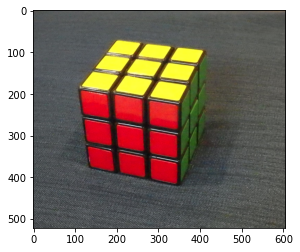

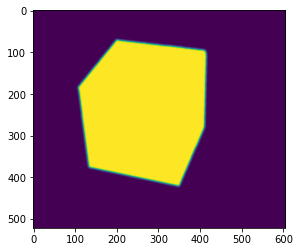

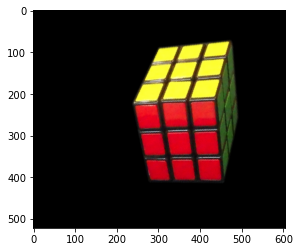

In [4]:
from math import sin, cos, sqrt 
from timeit import itertools
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np

PATHIM="../imagenes curso/"

imageName = "cube1.png"
maskName = "mask1.png"

inputImage=Image.open(PATHIM+imageName)
inputImage=np.array(inputImage)[:,:,0:3]
width, height = inputImage.shape[1],inputImage.shape[0]
print("Tamaño imagen original (columnas, filas,profundidad)",inputImage.shape)
plt.imshow(inputImage)

maskImage=ImageOps.grayscale(Image.open(PATHIM+maskName))
maskImage=np.array(maskImage)

widthm, heightm = maskImage.shape[1],maskImage[0]
print("Tamaño imagen máscara",maskImage.shape)
plt.figure(), plt.imshow(maskImage)



transformationType  = "Afín"
if transformationType  == "Similaridad":
    """
    Matriz de transformación que combina:
        Una transformación de rotación de -40 grados.
        Una transformación de escalado con factor (0.8, 0,8)
        Un desplazamiento con factor (100, 0)
    """
    s = [.4, 0.8, 0.8, 100.0, 0.0] 
    T = [[ s[1]*cos(s[0]), s[1]*sin(s[0]), s[3]],                        \
         [ -s[2]*sin(s[0]), s[2]*cos(s[0]), s[4]],                       \
         [0 ,0, 1]]
    
if transformationType  == "Afín":
    """
    Matriz de transformación que combina:
        Una transformación shear con factor (0.2, 0.1)
        Una transformación de escalado con factor (0.8, 1)
        Un desplazamiento con factor (100, 0)
    """
    T = [[ 0.8, 0.1, 100],                                                  \
         [-0.2, 1, 0],                                                    \
         [0 ,0, 1]]

    
    
centreX, centreY = width/2, height/2
tImage=np.zeros(inputImage.shape,dtype='uint8')


"""
El método itertools.product() calcula el producto cartesiano de dos variables iterables.
En este caso obtenemos una manera más eficiente de recorrer la imagen de izquierda a derecha y de arriba abajo 
ya que el resultado de esta implementación es el mismo que el de dos ciclos for anidados, donde uno recorre las
filas y el otro las columnas.
"""
for y, x in itertools.product(range(0, height-1), range(0, width-1)):
    alpha = maskImage[y,x]/256.0 
    
    #Si no estamos en un pixel de dentro de la máscara pasamos al siguiente
    if alpha == 0: 
        continue
    rgb = (inputImage[y,x]/4.0   + inputImage[y+1,x+1]/4.0 +                \
           inputImage[y+1,x]/4.0 + inputImage[y,x+1]/4.0) * alpha
    
    cx, cy = x - centreX, y - centreY
    p0z = 1.0 
    p1z = 1.0 
    p2z = 1.0 
    
    """
    Calcula las coordenadas de tres píxeles de la imagen destino usando la matriz de transformación elegida.
    La división por los pz no hace nada en esta caso ya que siempre son uno, sin embargo si quisieramos implementar
    una homografía serían necesarios porque sus valores cambiarían.
    El sistema de ecuaciones para calcular x' e y' son:
    x' = T[0][0]cx + T[0][1]cy + T[0][2]) / centreX
    y' = T[1][0]cx + T[1][1]cy + T[1][2]) / centreY
    """
    if p0z != 0 and p1z != 0 and p2z !=0:
        p0x = int((T[0][0] * cx + T[0][1] * cy + T[0][2]) / p0z + centreX) 
        p0y = int((T[1][0] * cx + T[1][1] * cy + T[1][2]) / p0z + centreY) 
        p1x = int((T[0][0] * (cx+1) + T[0][1] * cy + T[0][2]) / p1z + centreX)
        p1y = int((T[1][0] * (cx+1) + T[1][1] * cy + T[1][2]) / p1z + centreY) 
        p2x = int((T[0][0] * (cx+1) + T[0][1] * (cy+1) + T[0][2]) / p2z + centreX)
        p2y = int((T[1][0] * (cx+1) + T[1][1] * (cy+1) + T[1][2]) / p2z + centreY) 

        #Calcula los vectores p0-p1 y p0-p2
        v1,v2 = [p1x - p0x, p1y - p0y], [p2x - p0x, p2y - p0y]

        #Calcula el modulo de los dos vectores
        lv1 = max(.001,sqrt(v1[0]*v1[0] + v1[1]*v1[1]))
        lv2 = max(.001,sqrt(v2[0]*v2[0] + v2[1]*v2[1]))
        #Calcula el vector unitario de los vectores
        v1N = [v1[0]/lv1, v1[1]/lv1]
        v2N = [v2[0]/lv2, v2[1]/lv2]

        """
        Con los vectores que acaba de calcular lo que hacemos es en lugar de obtener el valor RGB para un sólo pixel
        obtenemos los valores por el área comprendida entre los dos vectores.
        Para hacer esto iteremos por todos los píxeles que podemos obtener con los vectores de la misma manera
        que lo hacemos con los píxeles de la imagen (usando itertools.product()). Si obtenemos una coordenada 
        fuera de la imagen la desestimamos y pasamos al siguiente píxel. 
        """
        
            a = int(p0x + dV1 * v1N[0] + dV2 * v2N[0])
            b = int(p0y + dV1 * v1N[1] + dV2 * v2N[1])
            if a>0 and a < width and b > 0 and b < height:
                tImage[b,a] = rgb
                
plt.figure()
_=plt.imshow(tImage)

### Cuarto Ejercicio

Modifica el código anterior para que también pueda realizar una homografía. Para ello debes añadir a la celda siguiente el código que necesites de la anterior y cambiar lo que sea necesario. 
    
Total: 2 puntos.

Tamaño imagen original (columnas, filas,profundidad) (522, 605, 3)
Tamaño imagen máscara (522, 605)


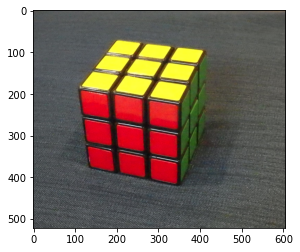

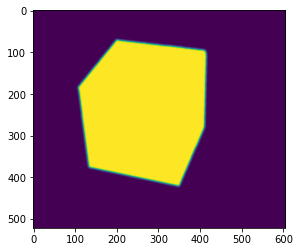

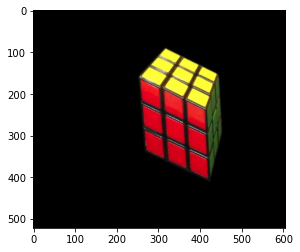

In [27]:
from math import sin, cos, sqrt 
from timeit import itertools
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np

PATHIM="../imagenes curso/"

imageName = "cube1.png"
maskName = "mask1.png"

inputImage=Image.open(PATHIM+imageName)
inputImage=np.array(inputImage)[:,:,0:3]
width, height = inputImage.shape[1],inputImage.shape[0]
print("Tamaño imagen original (columnas, filas,profundidad)",inputImage.shape)
plt.imshow(inputImage)

maskImage=ImageOps.grayscale(Image.open(PATHIM+maskName))
maskImage=np.array(maskImage)

widthm, heightm = maskImage.shape[1],maskImage[0]
print("Tamaño imagen máscara",maskImage.shape)
plt.figure(), plt.imshow(maskImage)


transformationType  = "Homografía"
if transformationType  == "Similaridad":
    s = [.4, 0.8, 0.8, 100.0, 0.0] 
    T = [[ s[1]*cos(s[0]), s[1]*sin(s[0]), s[3]],                        \
         [ -s[2]*sin(s[0]), s[2]*cos(s[0]), s[4]],                       \
         [0 ,0, 1]]
if transformationType  == "Afín":
    # Affine transformation
    T = [[ 0.8, 0.1, 100],                                                  \
         [-0.2, 1, 0],                                                    \
         [0 ,0, 1]]
if transformationType  == "Homografía":
    # Homography
    T = [[ .8, 0, 100],                                                    \
         [ .2,1, 0],                                                       \
         [.0005 ,-0.0005 , 1.2]]

centreX, centreY = width/2, height/2
tImage=np.zeros(inputImage.shape,dtype='uint8')

 
for y, x in itertools.product(range(0, height-1), range(0, width-1)):
    alpha = maskImage[y,x]/256.0 
    
    if alpha == 0: 
        continue
        
    rgb = (inputImage[y,x]/4.0   + inputImage[y+1,x+1]/4.0 +                \
           inputImage[y+1,x]/4.0 + inputImage[y,x+1]/4.0) * alpha
    
    cx, cy = x - centreX, y - centreY
    
    """
    Para implementar la homografía lo único que hay que hacer es incluir el cálculo de las
    coordenadas Z de los puntos.
    Sabemos que la transf. proyectiva es la proyección perspectiva de un plano
    colocado sobre un espacio 3D, de tal manera que la proyección de un punto
    P=(x,y,x) sobre el plano de la imagen es P'=(x/z, y/z)
    Por tanto, de las ecuaciones de las diapositivas:
    
    x'=T[0][0]x + T[0][1]y + T[0][2]) / T[2][0]x + T[2][1]y + T[2][2]
    
    deducimos que:
    
    z = T[2][0]x + T[2][1]y + T[2][2]    
    """
    
    p0z = T[2][0] * cx + T[2][1] * cy + T[2][2]
    p1z = T[2][0] * (cx+1) + T[2][1] * cy + T[2][2]
    p2z = T[2][0] * (cx+1) + T[2][1] * (cy+1) + T[2][2] 

    if p0z != 0 and p1z != 0 and p2z !=0:
        p0x = int((T[0][0] * cx + T[0][1] * cy + T[0][2]) / p0z + centreX) 
        p0y = int((T[1][0] * cx + T[1][1] * cy + T[1][2]) / p0z + centreY) 
        p1x = int((T[0][0] * (cx+1) + T[0][1] * cy + T[0][2]) / p1z + centreX)
        p1y = int((T[1][0] * (cx+1) + T[1][1] * cy + T[1][2]) / p1z + centreY) 
        p2x = int((T[0][0] * (cx+1) + T[0][1] * (cy+1) + T[0][2]) / p2z + centreX)
        p2y = int((T[1][0] * (cx+1) + T[1][1] * (cy+1) + T[1][2]) / p2z + centreY) 


        v1,v2 = [p1x - p0x, p1y - p0y], [p2x - p0x, p2y - p0y]

        lv1 = max(.001,sqrt(v1[0]*v1[0] + v1[1]*v1[1]))
        lv2 = max(.001,sqrt(v2[0]*v2[0] + v2[1]*v2[1]))

        v1N = [v1[0]/lv1, v1[1]/lv1]
        v2N = [v2[0]/lv2, v2[1]/lv2]


        for dV1, dV2 in itertools.product(range(0, int(lv1)+1), range(0, int(lv2)+1)):
            a = int(p0x + dV1 * v1N[0] + dV2 * v2N[0])
            b = int(p0y + dV1 * v1N[1] + dV2 * v2N[1])
            if a>0 and a < width and b > 0 and b < height:
                tImage[b,a] = rgb

plt.figure()
_=plt.imshow(tImage)

### Quinto ejercicio

Utilizando lo que hemos visto en las clases de procesamiento de imágenes (no de introducción a Python), propón un problema de interés y escribe el código de su solución. Puedes, por ejemplo, visitar la página del toolboox de Matlab https://es.mathworks.com/products/image.html y escribir en Python alguno de los ejemplos relacionados con lo que ya hemos visto en clase.

Total: 1 punto.